# ML innlevering 2 - TMDB Box Office Prediction

DET VI SKAL PREDICTE ER REVENUE PÅ HVER AV ID-ENE ("try and predict their overall worldwide box office revenue")

During this project we will use the eight steps in Appendix B:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# Hei og velkommen

#### Get the data:

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [148]:
#lists the files in the folder
import os
print(os.listdir("data"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [149]:
#Reads in the csv-files and creates a dataframe using pandas

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

## Explore the data

In [150]:
train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

Info gives a clean list of all the features in the train set. Most of the features are objects, except a few which are ints or floats. Info also contains info about the Non-Null numbers. Some features contains a smaller amount of Non-Null numbers, whoch means there are missing data. The column "belongs_to_collection" have a very small Non-Null so the feature probably have a lot of missing data. Lets go deeper:

The code underneath provides an overview of missing values in train. The missing values makes it harder to give good predictions, if it is not handled correctly.

In [152]:
print(train.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


Homepage are one of the features that has a lot of missing values. This feature is not seen as a important feature in order to predict revenue. Therefore this feature will be dropped. 

In this first round we are dropping all the features that has missing values, and then we will keep the necessary ones and calculate the missing values

In [153]:
train.drop(['homepage','imdb_id','belongs_to_collection',
            'genres','overview','production_companies',
            'production_countries','poster_path','spoken_languages',
            'tagline','Keywords','crew','cast'],axis=1)

id    budget original_language  \
0        1  14000000                en   
1        2  40000000                en   
2        3   3300000                en   
3        4   1200000                hi   
4        5         0                ko   
...    ...       ...               ...   
2995  2996         0                en   
2996  2997         0                sv   
2997  2998  65000000                en   
2998  2999  42000000                en   
2999  3000  35000000                en   

                                original_title  popularity release_date  \
0                       Hot Tub Time Machine 2    6.575393      2/20/15   
1     The Princess Diaries 2: Royal Engagement    8.248895       8/6/04   
2                                     Whiplash   64.299990     10/10/14   
3                                      Kahaani    3.174936       3/9/12   
4                                         마린보이    1.148070       2/5/09   
...                                        ...         ...          ...   
2995                                   Chasers    9.853270      4/22/94   
2996                               Vi är bäst!    3.727996      3/28/13   
2997                   The Long Kiss Goodnight   14.482345     10/11/96   
2998                          Along Came Polly   15.725542      1/16/04   
2999                                 Abduction   10.512109      9/22/11   

      runtime    status                                     title    revenue  
0        93.0  Released                    Hot Tub Time Machine 2   12314651  
1       113.0  Released  The Princess Diaries 2: Royal Engagement   95149435  
2       105.0  Released                                  Whiplash   13092000  
3       122.0  Released                                   Kahaani   16000000  
4       118.0  Released                                Marine Boy    3923970  
...       ...       ...                                       ...        ...  
2995    102.0  Released                                   Chasers    1596687  
2996    102.0  Released                          We Are the Best!     180590  
2997    120.0  Released                   The Long Kiss Goodnight   89456761  
2998     90.0  Released                          Along Came Polly  171963386  
2999    106.0  Released                                 Abduction   82087155  

[3000 rows x 10 columns]

In [154]:
#for i, e in enumerate(train['belongs_to_collection'][:5]):
  #  print(i, e)

In [155]:
#train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

### Lets also understand the popularity of the genres

In [156]:
#for i, e in enumerate(train['genres'][:5]):
   # print(i, e)

In [157]:
#print('Number of genres in films')
#train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

In [158]:
#list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [159]:
#plt.figure(figsize = (12, 8))
#text = ' '.join([i for j in list_of_genres for i in j])
#wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      #width=1200, height=1000).generate(text)
#plt.imshow(wordcloud)
#plt.title('Top genres')
#plt.axis("off")
#plt.show()
# laga ett tankekart på en måte, der modellen framheva dei mest populære sjangrane. 
# Vil ikkje kjøre pga mangla list_of_genres fra kodelinja over.

In [160]:
train.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

If std had been 1 and mean hade been 0, it would have been a perfect result already

### Test set

To split the train set and test set we use the train_test_split method, which will split the data set randomly in two parts.

In [161]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [162]:
test.head()

id                              belongs_to_collection   budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
1  3002                                                NaN    88000   
2  3003                                                NaN        0   
3  3004                                                NaN  6800000   
4  3005                                                NaN  2000000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

                                production_countries release_date runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97   100.0   
3  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10   130.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05    92.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, 'name': 'revenge'}, {'id': 9951,...   
2  [{'id': 931, 'name': 'jealousy'}, {'id': 9673,...   
3  [{'id': 378, 'name': 'prison'}, {'id': 539, 'n...   
4  [{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...   

                                                cast  \
0  [{'cast_id': 3, 'character': 'Tonio', 'credit_...   
1  [{'cast_id': 2, 'character': 'Nancy Fowler Arc...   
2  [{'cast_id': 11, 'character': 'Maggie', 'credi...   
3  [{'cast_id': 6, 'character': 'Nawal', 'credit_...   
4  [{'cast_id': 1, 'character': 'Narrator (voice)...   

    

In [163]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [164]:
test.describe()

id        budget   popularity      runtime
count  4398.000000  4.398000e+03  4398.000000  4394.000000
mean   5199.500000  2.264929e+07     8.550230   107.622212
std    1269.737571  3.689991e+07    12.209014    21.058290
min    3001.000000  0.000000e+00     0.000001     0.000000
25%    4100.250000  0.000000e+00     3.895186    94.000000
50%    5199.500000  7.450000e+06     7.482241   104.000000
75%    6298.750000  2.800000e+07    10.938524   118.000000
max    7398.000000  2.600000e+08   547.488298   320.000000

Observation: many NaN

In [165]:
len(test)

4398

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd16808aa00>]],
      dtype=object)

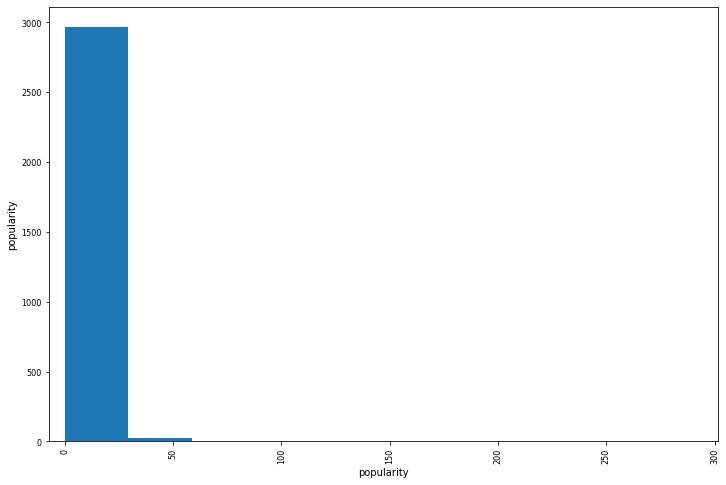

# Handeling text

Most of the provided values are not numeric, therefore it is important to make all of the objects numeric

In [167]:
train["original_language"].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
pl       2
fi       2
te       2
no       2
ml       2
ur       1
bn       1
sr       1
vi       1
cs       1
mr       1
id       1
he       1
el       1
nb       1
ar       1
Name: original_language, dtype: int64

In [168]:
original_language_cat = train[["original_language"]]
original_language_cat.head(10)

original_language
0                en
1                en
2                en
3                hi
4                ko
5                en
6                en
7                en
8                en
9                en

In order to compute the median for original_language, it is necessary to convert the category from text to number. In the following code, OrdinalEncoder is used to convert the text. And then OneHotEncoder is used to create an array.

In [169]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

In [170]:
ordinal_encoder = OrdinalEncoder()
original_language_cat_encoded = ordinal_encoder.fit_transform(original_language_cat)
original_language_cat_encoded[:10]

array([[ 7.],
       [ 7.],
       [ 7.],
       [13.],
       [18.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 7.]])

In [171]:
cat_encoder = OneHotEncoder()
original_language_cat_hot = cat_encoder.fit_transform(original_language_cat_encoded)
original_language_cat_hot
original_language_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [172]:
ordinal_encoder.categories_

[array(['ar', 'bn', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi',
        'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'ko', 'ml', 'mr', 'nb',
        'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr',
        'ur', 'vi', 'zh'], dtype=object)]

#### Original title

In [173]:
train["original_title"].value_counts()

Unknown                                    2
The Other Woman                            2
Anna Karenina                              2
Alone in the Dark                          2
The Women                                  2
                                          ..
Alvin and the Chipmunks: The Road Chip     1
Mute Witness                               1
And You Thought Your Parents Were Weird    1
The Ballad of Jack and Rose                1
Yes Man                                    1
Name: original_title, Length: 2975, dtype: int64

In [174]:
original_title_cat = train[["original_title"]]
original_title_cat.head(10)

original_title
0                    Hot Tub Time Machine 2
1  The Princess Diaries 2: Royal Engagement
2                                  Whiplash
3                                   Kahaani
4                                      마린보이
5    Pinocchio and the Emperor of the Night
6                            The Possession
7                              Control Room
8                    Muppet Treasure Island
9                             A Mighty Wind

In [175]:
original_title_cat_encoded = ordinal_encoder.fit_transform(original_title_cat)
original_title_cat_encoded[:10]

array([[1003.],
       [2429.],
       [2751.],
       [1138.],
       [2957.],
       [1626.],
       [2421.],
       [ 515.],
       [1447.],
       [  72.]])

In [176]:
original_title_cat_hot = cat_encoder.fit_transform(original_title_cat_encoded)
original_title_cat_hot
original_title_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [177]:
ordinal_encoder.categories_

[array(["'71", "'N Beetje Verliefd", '(500) Days of Summer', ..., '피에타',
        '해운대', '회사원'], dtype=object)]

####  Status

In [178]:
train["status"].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [179]:
status_cat = train[["status"]]
status_cat.head(10)

status
0  Released
1  Released
2  Released
3  Released
4  Released
5  Released
6  Released
7  Released
8  Released
9  Released

In [180]:
status_cat_encoded = ordinal_encoder.fit_transform(status_cat)
status_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [181]:
status_cat_hot = cat_encoder.fit_transform(status_cat_encoded)
status_cat_hot
status_cat_hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [182]:
ordinal_encoder.categories_

[array(['Released', 'Rumored'], dtype=object)]

KeyError: "['original_title_cat_hot', 'status_cat_hot'] not in index"